In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
country_summary['Death_to_Case_Ratio'] = country_summary['Death_to_Case_Ratio'].replace([float('inf'), -float('inf')], pd.NA)
country_summary['Death_to_Case_Ratio'] = country_summary['Death_to_Case_Ratio'].fillna(0)


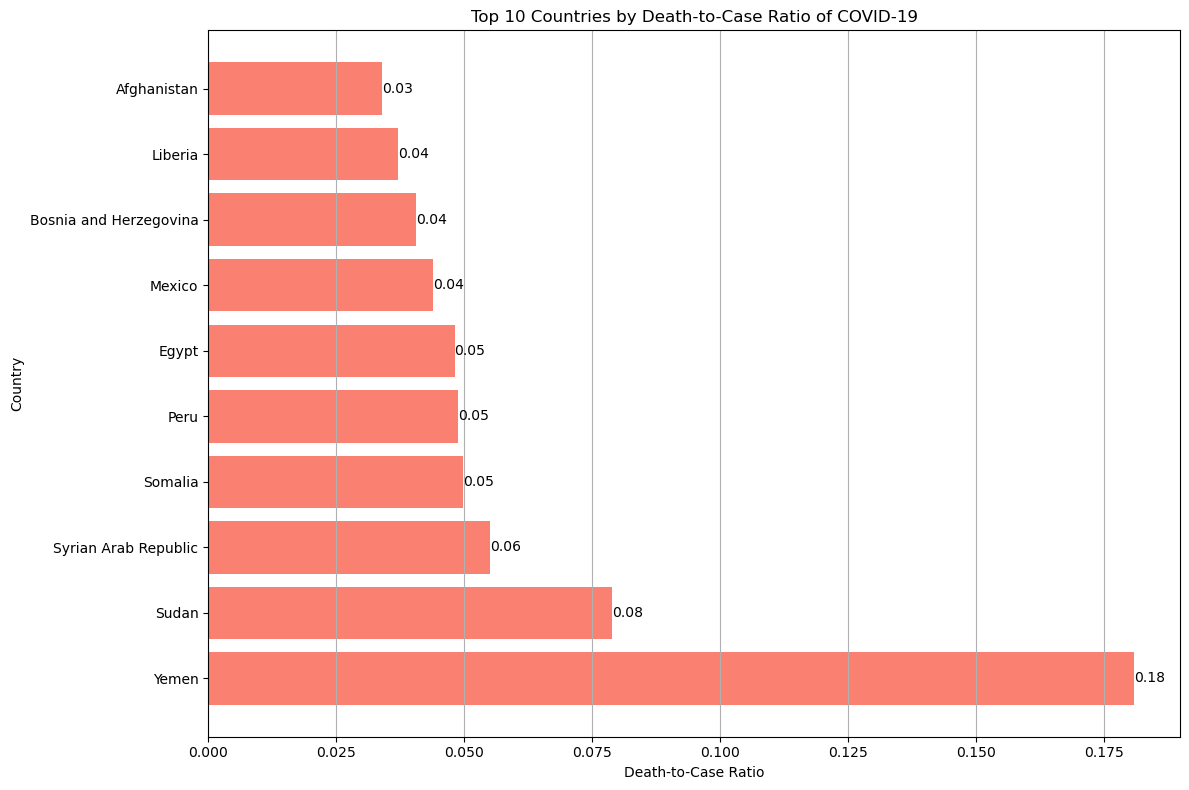

In [32]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Group by country and sum the new cases and deaths
country_summary = df.groupby('Country').agg({
    'New_cases': 'sum',
    'New_deaths': 'sum'
}).reset_index()

# Calculate the death-to-case ratio, handling division by zero
country_summary['Death_to_Case_Ratio'] = country_summary.apply(
    lambda row: row['New_deaths'] / row['New_cases'] if row['New_cases'] > 0 else 0,
    axis=1
)

# Sort by the death-to-case ratio
country_summary = country_summary.sort_values(by='Death_to_Case_Ratio', ascending=False)

# Limit to top N countries for better visualization
top_n = 10
country_summary_top = country_summary.head(top_n)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(country_summary_top['Country'], country_summary_top['Death_to_Case_Ratio'], color='salmon')

# Adding annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10)

# Adding titles and labels
plt.title('Top 10 Countries by Death-to-Case Ratio of COVID-19')
plt.xlabel('Death-to-Case Ratio')
plt.ylabel('Country')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()


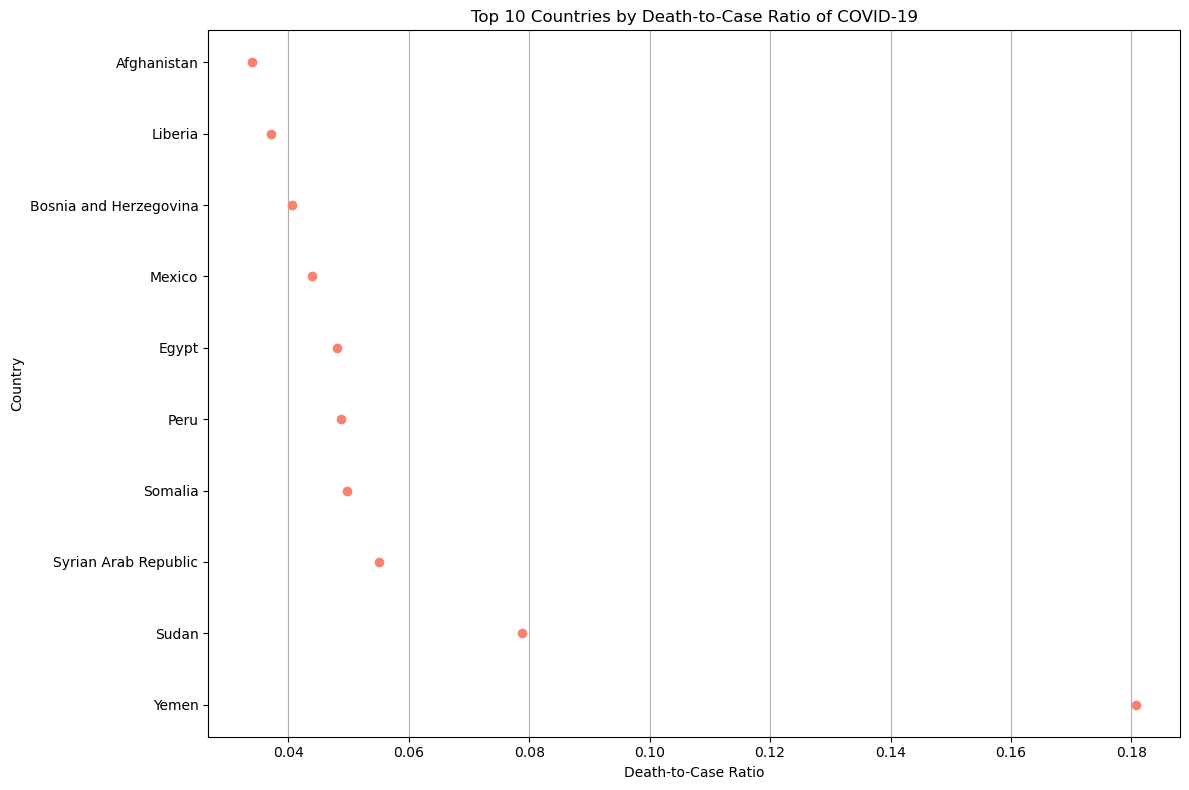

In [34]:
# Plotting a dot plot
plt.figure(figsize=(12, 8))
plt.plot(country_summary_top['Death_to_Case_Ratio'], country_summary_top['Country'], 'o', color='salmon')

# Adding titles and labels
plt.title('Top 10 Countries by Death-to-Case Ratio of COVID-19')
plt.xlabel('Death-to-Case Ratio')
plt.ylabel('Country')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()
